# Using Random Numbers

In the previous lecture, we looked at how we can use a pseudorandom number generator (pRNG) to generate numbers that are statistically random. We will now start looking at how we can actually use these random numbers.


## Other References

Note that Langtangen covers the use of random numbers in Python in *Chapter 8: Random numbers and Simple Games*. Some of our examples are borrowed directly from this chapter.


## Random in Python

In the previous lecture we explored how computers can use pseudorandom number generators to produce sequences of numbers that are *statistically* random. There we saw some simple examples of how such pRNGs can be made. However, in practice, when you need access to random numbers in your scripts, the easiest thing is to rely on well made packages to do this. In Python, you have access to the standard library `random`, and NumPy has its own `numpy.random` package for vectorized generation of random numbers. Both of these rely on the Mersenne Twister algorithm. As mentioned in the previous lecture, this is the gold standard for pRNGs, and quite decent for most scientific applications.


## Seeding

Like any pRNG, you can seed the Python pRNG with the function `seed`. If you do not do so, a seed is chosen for you. If you are going to be testing your code, or you are looking for bugs, fixing the seed is a good idea

In [1]:
import random
random.seed(1234)
print(random.random())

0.9664535356921388


In [2]:
import numpy as np
np.random.seed(4545)
print(np.random.random())

0.10816512939267264


Both of these packages have a function called `random()`, which returns a pseudorandom floating point in the range $[0, 1)$. We also have access to plenty of other functions, which draw numbers from other distributions. These are mostly implemented as using `random()` behind the scenes. The underlying *randomness* is always generated by the Mersenne Twister in the same manner.

Note that the `random` and `np.random` packages are very similar, with some slight differences. We won't go through and show every example with both. The major difference is that the numpy package is *vectorized*, meaning we can draw a whole set of random numbers at once. Because of this, it is the `np.random` package that is most useful in practice for scientific applications, and the one we will focus on in this lecture.

Note also that for cryptographic and security purposes, the Mersenne Twister is completely unsuited. In these cases you should not use the `random` libraries. For such purposes, you should instead look at the [secrets](https://docs.python.org/3/library/secrets.html) library, which was released with Python 3.6.


### `random()`

The simplest function, but perhaps also the most important, is `random()`, which returns a number in the range $[0, 1)$.

In [3]:
print(np.random.random())
print(np.random.random())
print(np.random.random())

0.614351942079199
0.4605892547831276
0.09490861368747994


With `np.random`, you can draw multiple numbers at once with the keyword argument `size`. The results are then returned in a numpy array.

In [4]:
print(np.random.random(size=30))

[0.22757495 0.93708434 0.87707599 0.62073907 0.94567712 0.98839807
 0.12890789 0.19876454 0.17536972 0.10987037 0.45100604 0.46309978
 0.08646816 0.00778096 0.68880803 0.08254698 0.77910104 0.05202863
 0.06692324 0.59134301 0.37129806 0.85377894 0.96742315 0.09143025
 0.06656051 0.13993966 0.95915816 0.99945193 0.28371376 0.23228119]


We can plot some of these random numbers and see how they look

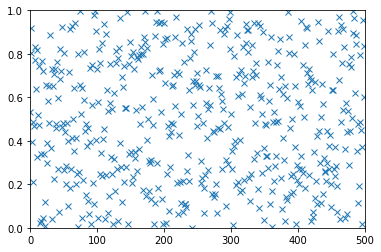

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

N = 500  # no of samples
samples = np.random.random(size=N)

plt.plot(samples, 'x')
plt.axis((0, N, 0, 1))
plt.show()

We expect a uniform distribution with `np.random.random`. If we want a different uniform distribution, $[a, b]$, we can use the function `np.random.uniform(a, b)` to produce this:

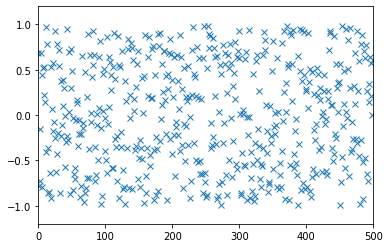

In [6]:
N = 500
samples = np.random.uniform(-1, 1, size=N)

plt.plot(samples, 'x')
plt.axis((0, N, -1.2, 1.2))
plt.show()

If these numbers are actually uniformly distributed, we would expect the sample mean and sample standard deviation to approach the expected mean and standard deviation of a uniform distribution. Let us check this.

The expected mean of a uniform distribution is simply the mean of the interval

$$E(X) = \frac{a + b}{2}$$
And the variance is given by
$$\mbox{V}(x) = \frac{(b-a)^2}{12}.$$
And the standard deviation is the square of this $\sigma = \sqrt{{\rm V}(X)}$.

For our uniform distribution, we have $a = -1$, $b=1$. So we expected our random samples to have

$$\mbox{mean} = 0, \qquad \mbox{variance} = \frac{1}{3}, \qquad \mbox{standard deviation} = 0.57735$$
Let us test if this is the case

In [7]:
print(f"{'N':>10} {'mean':>10} {'var':>10} {'std':>10}")
print("="*50)

for N in 10, 100, 1000, 10000, 10**5, 10**6:
    x = np.random.uniform(-1, 1, size=N)
    mean = np.mean(x)
    variance = np.var(x)
    std = np.std(x)
    print(f"{N:10d} {mean:10.5f} {variance:10.5f} {std:10.5f}")

print("="*50)

         N       mean        var        std
        10   -0.03521    0.28530    0.53413
       100    0.01240    0.34114    0.58407
      1000    0.01992    0.34044    0.58347
     10000   -0.00264    0.33539    0.57912
    100000   -0.00154    0.33278    0.57687
   1000000   -0.00077    0.33322    0.57725


As we draw more and more uniform samples, we see the sample mean, variance and standard deviation converge towards the expected values for a uniform distribution.


### Flipping coins with `randint()`

If you instead need random integers, you should use the function `randint()`. This function takes either one argument, in which case you get a uniformly distributed random integer on the range $[0, N)$, or it takes two integers, in which case you get a number on the range $[a, b)$.

To flip a coin, we can therefore do

In [8]:
for i in range(3):
    result = np.random.randint(2)

    if result == 1:
        print("heads")
    elif result == 0:
        print("tails")

heads
heads
heads


Say we want to flip a thousand coins, we can do this with a loop:

In [9]:
heads = 0
tails = 0
for i in range(1000):
    flip = np.random.randint(2)
    if flip == 1:
        heads += 1
    elif flip == 0:
        tails += 1

print("Heads:", heads)
print("Tails:", tails)

Heads: 490
Tails: 510


However, using a for-loop combined with an if-test like this is very slow. It would be much faster to draw all the numbers at once. We could for example do it like this:

In [10]:
N = 1000

flips = np.random.randint(2, size=N)
heads = np.sum(flips)
tails = N - heads

print("Heads:", heads)
print("Tails:", tails)

Heads: 506
Tails: 494


Let's do a quick comparison of how fast these two solutions are:

In [11]:
def serial_flips(N):
    heads = 0
    tails = 0
    for i in range(N):
        flip = np.random.randint(2)
        if flip == 1:
            heads += 1
        elif flip == 0:
            tails += 1
    return heads, tails

def vectorized_flips(N):
    flips = np.random.randint(2, size=N)
    heads = np.sum(flips)
    tails = N - heads
    return heads, tails

We can use `timeit` to time how fast certain code is in Python. In Jupyter, we can invoke timeit om a given function with the *cell magic* `%timeit`:

In [12]:
%timeit serial_flips(1000)

2.68 ms ± 13.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%timeit vectorized_flips(1000)

17.6 µs ± 71.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [14]:
%timeit serial_flips(10**5)

270 ms ± 2.13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%timeit vectorized_flips(10**5)

466 µs ± 182 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


From these simple trials, it seems the vectorized version is about 100-300 times as fast as the serial version. This is because everything is happening vectorized in low-level C code. Note that we also use `np.sum` to sum the resulting array, which is much faster than using the built-in `sum` function.


### Rolling dice with `randint()`

As we can adjust the boundaries of `randint()`, we can also use it do get other discrete, uniform distributions. Rolling a die for example, should give numbers from 1 through 6, and so we can roll a die with `np.random.randint(1,7)`:

In [16]:
print(np.random.randint(1, 7))
print(np.random.randint(1, 7))
print(np.random.randint(1, 7))

5
1
6


We can now roll two dice, and sum them:

In [17]:
for _ in range(5):
    print(np.sum(np.random.randint(1, 7, size=2)))

6
8
7
8
10


The result when summing two dice is a number from 2 through 12. However, these numbers will *not* be uniformly distributed, and so we could *not* simply do `randint(2, 13)` to get such a number!

Say we want to roll 1000 pairs of dice, how could we do so vectorized? Well, the `size` keyword can be a *tuple* to specify more complex shapes than simply the number of throws. So we could do:

In [18]:
samples = np.random.randint(1, 7, size=(1000, 2))
print(samples)

[[5 1]
 [1 1]
 [1 1]
 ...
 [3 6]
 [5 5]
 [5 1]]


Now we have a two dimensional array of shape $1000\times 2$. We can sum this array along only one of it's axis with `np.sum`:

In [19]:
sums = np.sum(samples, axis=1)

print(sums.shape)
print(sums[:20])

(1000,)
[ 6  2  2 10  6 10  6 11  2  7  5  3  7 10  7  4  3  6  6 11]


So now we have our 1000 summed pair of die-rolls. We can plot it as a histogram:

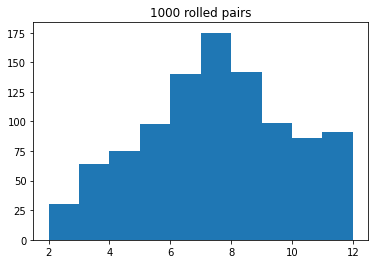

In [20]:
plt.hist(sums)
plt.title('1000 rolled pairs')
plt.show()

This distribution didn't come out looking very nice, did it? For one thing, it looks to be very right-skewed, with considerably more results of 12 than for 2. Isn't this weird? It of course could be that we are unlucky. But that seems like a *serious* skew, with almost a twice the rolls of 12! What is going on here?

Sometimes, the problem does not lie in our sampling, or calculation itself, but simply in the plotting. Let us simplify and simply write out the number each result comes up:

In [21]:
for n in range(2, 13):
    print(f"{n:2}: {np.sum(sums == n)}")

 2: 30
 3: 64
 4: 75
 5: 98
 6: 140
 7: 175
 8: 142
 9: 99
10: 86
11: 56
12: 35


From simply writing it out, things look a lot more reasonable. For one thing, we actually have less 12's than we do 2's! The answer lies simply in how the histogram binning works. To fix it, we can for example explicitly set the bin edges between each number, so we start at 1.5 to 2.5, then 2.5 to 3.5 and so on:

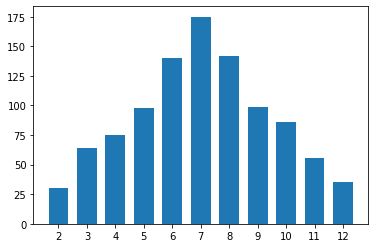

In [22]:
plt.hist(sums, bins=np.arange(1.5, 13), rwidth=0.7)
plt.xticks(range(2, 13))
plt.show()

This histogram looks a lot more reasonable. There are still some weird results, such as 6 occurring more than 7, but these seem to be just slightly offsets from the expected distribution, and we are only doing 1000 samples, which is not that much. Let us try again with some more samples:

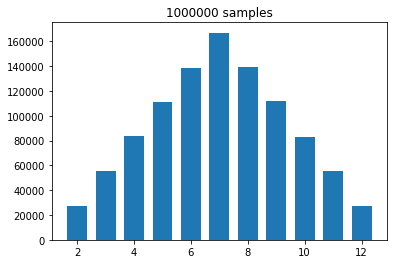

In [23]:
N = 10**6
samples = np.random.randint(1, 7, size=(N, 2))
samples = np.sum(samples, axis=1)

plt.hist(samples, bins=np.arange(1.5, 13), rwidth=0.7)
plt.title(f"{N} samples")
plt.show()

### Normally-distributed numbers

To generate normally distributed values, use `np.random.normal(mean, std)` (or `random.normalvariate(mean, std)`). Let us produce a histogram:

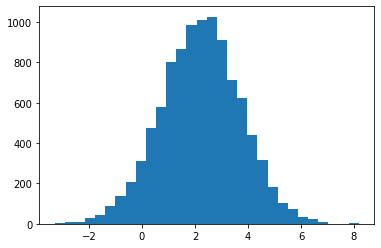

In [24]:
x = np.random.normal(2.2, 1.5, size=10000)

plt.hist(x, bins=30)
plt.show()

That does look fairly Normally distributed. If we want to plot the corresponding probability density function, we can use `scipy.stats.norm.pdf`. Then we should also use the `density` keyword to `plt.hist`, to normalize the y-axis so it plots a probability density distribution, and not the number of occurrences.

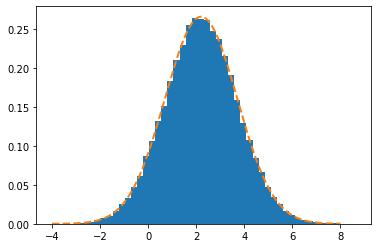

In [25]:
N = 10**5
mean = 2.2
sigma = 1.5

#### Drawing Random samples
x = np.random.normal(mean, sigma, size=N)
plt.hist(x, bins=50, density=True)

#### Drawing the mathematical bell curve
import scipy.stats
x = np.linspace(-4, 8, 1001)
plt.plot(x, scipy.stats.norm.pdf(x, mean, sigma), '--', linewidth=2.0)

plt.show()

### Drawing Random Elements

If we have a set of elements, say for instance, a list, we can draw a sample of random elements using `np.random.choice`. We can for example use this to generate a lottery-winner:

In [26]:
candidates = ["Alfred", "Beatrice", "Charlie", "Danielle", "Elinor", "Fredrick", "Gabriel"]
winner = np.random.choice(candidates)
print(winner)

Alfred


We can of course draw a sample of multiples:

In [27]:
winners = np.random.choice(candidates, 2)
print(winners)

['Elinor' 'Beatrice']


Be a bit careful however, as drawing multiple samples automatically uses replacement. You therefore risk running into drawing the same person twice. Add the optional keyword `replace=False` to turn of this.


### Example: Drawing Balls from a Bag

Let us look at an example. If we have a bag that contains two red, and two blue balls in it. If we draw two balls at random from this bag. What is the chance that we get one of each color?


```{figure} ../../figures/four_balls.png
---
width: 300px
name: four_balls
alt: four_balls
---
```


Instead of analyzing this problem, let's simply carry out the experiment a bunch of times, and see how often we get one of each. To draw two balls at random we create a list with the contents of the bag, and use `choice(2, replace=False)` (because we draw two balls at the same time, we are drawing without replacement).

In [28]:
N = 10**5

hat = ['red', 'red', 'blue', 'blue']
success = 0

for trial in range(N):
    sample = np.random.choice(hat, 2, replace=False)

    if 'red' in sample and 'blue' in sample:
        success += 1

print(f"Number of experiments: {N}")
print(f"Number of successes:  {success}")
print(f"Ratio of success:     {success/N}")

Number of experiments: 100000
Number of successes:  66462
Ratio of success:     0.66462


So we see that we get one ball of each color roughly 2/3 of the time. From this we can conclude that the probability of drawing one of each color ball is 2/3, or 66.7%. This is an example of a *stochastic simulation*.  And why it doesn't tell us *why* the probability is 2/3, it can be a useful tool in exploring and finding probabilities in settings where we are struggling to do so.


### Shuffling lists

In this course we have talked quite a bit about sorting lists, but now we can talk about *shuffling* lists. Shuffling a list means moving the elements around so that they are at random indices. You can use the function `np.random.shuffle` to do this. Note that it shuffles a list *in-place*, and returns nothing:

In [29]:
numbers = np.arange(100)
print("Before Shuffle")
print(numbers)
print()

np.random.shuffle(numbers)
print("After shuffle")
print(numbers)

Before Shuffle
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]

After shuffle
[37 72 53 96 71 85 92 82 98 79  0 32 11 64 78 67 33 99 69 20 16 60 29  5
 76 55 22  6 91 41 42 35 63  4 27  1 89 24 56 59 40 73  2 34 74 12 21 94
 95 58 30 61 47 23  3 90 49 14 17 44 43 38 81 50 13 65 57 70 52  7 75 87
  9 83 48 77 45 18 68 54 15 19 39 31 28 93 51 62 26 97 36 46  8 88 84 86
 25 10 80 66]


If you want a shuffled copy of a list or array, but also keep the original, you will need to first copy it, and then shuffle the copy.

In [30]:
x = np.arange(10)
y = np.copy(x)
np.random.shuffle(y)

print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[3 5 1 6 7 2 9 0 8 4]


Note that it is not sufficient to write `y = x` to make a copy, this will only make `y` a reference to the array, and not an actual copy, and so changing `y` will also change the original:

In [31]:
x = np.arange(10)
y = x # Doesn't actually copy, just creates a new name binding. x and y will refer to the same object
np.random.shuffle(y)

print(x)
print(y)

[0 6 1 2 3 8 9 5 4 7]
[0 6 1 2 3 8 9 5 4 7]


## Testing Randomness

So far, we have seen plenty of examples of how we can draw random numbers, and how they can be used for simple experiments. But how can we be confident that our random numbers are actually random?

As we explained last week, what we care about is that our numbers are *statistically* random. This means they should behave exactly like truly random numbers, in a statistical sense.

Now, the tricky part of testing wether this is the case, is that randomness is finnicky. We can simply be "unlucky" and end up in a state that has very low probability, and conclude that our numbers are, in fact, not random. For example: if we throw a dice 10 times, and get a 1 each time, we will expect the dice is a fake. But a truly random die will surely get 10 sixes in a row sooner or later, so how can we be sure?

The way this is handles for RNGs, is that instead of creating *one* test for an RNG, we create a whole *battery* of tests that look at different properties and examples. To test an RNG we then run through all the different tests, perhaps multiple times. In this process, we might expect a single failure, or perhaps a couple, but if the RNG is outputting fundamentally non-random numbers, we will see many tests start to fail.

Creating such test batteries is a tricky process, and requires a good understanding of statistical methods. Therefore, these are often created by professionals to test arbitrary RNGs. A famous such test battery is the [*Diehard tests*](https://en.wikipedia.org/wiki/Diehard_tests). This set of tests was created in 1995 and distributed widely.

The first test of the Diehard is looking at the spacing of reoccurrences, and is therefore called the birthday spacings test, based on the Birthday problem, as explained in the previous lecture. The other tests are similar in nature. You for example have the *parking lot test*:
> Parking lot test: Randomly place unit circles in a 100×100 square. A circle is successfully parked if it does not overlap an existing successfully parked one. After 12,000 tries, the number of successfully parked circles should follow a certain normal distribution.

The Wikipedia article on the Diehard tests lists and explains all the tests used.

While the Diehard tests are very well known. A more recent, and ever stricter test battery is the [TestU01](https://en.wikipedia.org/wiki/TestU01) battery, which was released in 2007. Interestingly enough, the Mersenne Twister 19937 passes all of the Diehard tests, and most of, but not all of the TestU01 tests. Perhaps we will see a new pRNG take the place of Mersenne Twister as the de factor default pRNG in the coming years?


## Use of Randomness

We have now gone through and shown different function in `np.random` you can use to generate random numbers. For each function, we have shown some simple examples of how we can use these random numbers to explore different phenomenon.

### Mathematical Modeling

In mathematical modeling, we are attempting to create some model replicating or describing some physical phenomenon seen in nature. Some of these are deterministic, given a set of initial conditions, and boundary conditions, we expect deterministic outcomes. An example would be throwing a ball through the air.

Other phenomenon are inherently random. Some of our examples have been of exactly such phenomenon, such as throwing dice, or drawing balls from a hat randomly. While such examples might seem trivial, or non-important, they serve as a good illustration. Nature, at the lowest level, seems to behave randomly, and can at least be well described by random molecular and thermal motion. Modeling such systems requires randomness.

Even systems that are deterministic in nature, can act *chaotic*, such as you have seen yourself with the double pendulum. Another example would be weather forecasting. While such systems might be deterministic, we can never perfectly capture the initial conditions and boundary conditions of such a system. In addition, the limited precision of floating points means we cannot perfectly model the system over time, and numerical errors might change the trajectory of such as system. One solution to this can be to model the system stochastically, from a bunch of different initial conditions, and then use statistical techniques to pull out *averaged* behaviors of the system. This way we can learn a lot about a system, even if we cannot model its trajectory perfectly.

### Numerical Techniques

In addition to being used to include actual randomness in simulations. Many numerical techniques are based on using random sampling or random steps in some way. These techniques are used because they can be more effective at solving certain problems, meaning they for example converge towards a solution faster than a deterministic algorithm. Such techniques are usually referred to as *Monte Carlo* techniques, named from the famous *Casino de Monte-Carlo* in Monaco.



For the rest of this lecture, we will look at some more examples of using random numbers.


### Estimating probabilities

In our example of drawing balls from a bag, we repeated a simple experiment a bunch of times, and simply evaluated the number of times a specific outcome occurred. The ratio of outcomes gives us an *estimate* of the probability of that outcome.

This technique is completely general, as long as we can reproduce the random behavior itself, we can simply simulate a large number of experiments, and estimate the probability. Due to the law of large numbers, we know that the more experiments we carry out, the more confident we can be in our probability estimate. If we wanted to be more formal about it, we could use statistics to find a *confidence interval* of our estimates. For now, we skip this step.


#### Example Rolling 20 or more on 5 dice

If you roll 5 dice, and sum them all up. What is the chance of getting 20 or more? This is a fairly simple question, but analyzing mathematically is a bit more challenging. We could of course write out all the different  possible results, and count up every one that is 20 or more. But with 5 dice the number of possible combinations would be
$$6^5 = 7776.$$

So writing out *all* the outcomes would be too much work. Of course, you might be smart about it, and find some nice ways to categorize outcomes and such, but that would of course need some work as well, to think up all these clever tricks.

Let us instead simply *simulate* and estimate the probability:

In [32]:
N = 10**5
success = 0

for i in range(N):
    if np.sum(np.random.randint(1, 7, size=5)) >= 20:
        success += 1

print(f"Simulations: {N}")
print(f"Nr of >=20:  {success}")
print(f"Ratio:       {success/N}")

Simulations: 100000
Nr of >=20:  30595
Ratio:       0.30595


So from $N=10^5$ trials, it seems that the probability is at least close to 30.4%. If we want to do even more simulations, we might want to vectorize our example fully, so that we avoid the Python for-loop altogether.

In [33]:
N = 10**7
rolls = np.random.randint(1, 7, size=(N, 5))
rolls = np.sum(rolls, axis=1)
success = np.sum(rolls >= 20)

print(f"Simulations: {N}")
print(f"Estimated prob.: {success/N:.2%}")

Simulations: 10000000
Estimated prob.: 30.50%


So we can say with high confidence that the probability of rolling 20 or more in total is about 30.5%. If we wanted to be more precise in our statement, we could use some statistics to formulate a confidence interval for this estimate.


While this example is fairly simple, it illustrates how *easy* it is to get to the probability estimate, it is only a few lines of code that runs in a few seconds. Finding the probability analytically is a much bigger challenge. And while that is possible in this case, many cases are simply to complex to find an analytic expression for a probability at all, in which case estimates from Monte Carlo simulations might be all we have.


### Example: The Monty Hall Problem

The [*Monty Hall Problem*](https://en.wikipedia.org/wiki/Monty_Hall_problem) is a famous brain teaser that lead to a huge public debate in the US in 1990. The  problem, as it was originally states, is as follows:

```{figure} ../../figures/doors.png
---
width: 400px
name: doors
alt: doors
---
```


> Suppose you’re on a game show, and you’re given the choice of three doors. Behind one door is a car, behind the others, goats. You pick a door, say #1, and the host, who knows what’s behind the doors, opens another door, say #3, which has a goat. He says to you, "Do you want to pick door #2?" Is it to your advantage to switch your choice of doors?


```{figure} ../../figures/doors_open.png
---
width: 500px
name: doors_open
alt: doors_open
---
```


The reason this problem became so popular, is that it was sent in to the column *Ask Marilyn* in Parade Magazine. In *Ask Marilyn*, Marilyn vos Savant answered questions on logical puzzles and brain teasers. It was a popular column, for among other things, Marilyn was in the Guinness book of world records for having the World's highest IQ.

Now. In Marilyn's response in her column. She said that the right strategy is that you should switch to door number 2. And this is where the trouble started. In the coming week, there were thousands of mailed replies to Parade magazine, claiming Marilyn got this wrong. And this was not just from lay people, but many Ph.Ds. in mathematics, and several mathematics professors got into the fray. Declaring that Marilyn was not only dead wrong, but was in fact responsible for the poor level of math education in the US. Pretty harsh stuff.

In the coming weeks, Marilyn would not budge on her answer, instead writing different explanations and rationals in her answer. However, likewise, the mathematicians would not agree with her, calling her stubborn and ignorant.

The whole debacle ended when Marilyn proposed a challenge to the primary schools of the US. Simply perform the experiment in your classroom with some paper cups and a die. And this put the whole debate to an end, as more and more classrooms performed the experiment, the results were tallied up, and showed that Marilyn was in fact right all along, you *should* switch.

And lo and behold, after this empirical proof of her answer, the academics came around, and now took the time to analyze the problem properly. And of course her answer was correct, it was only logical they declared.

Now. The Monty Hall problem is not just an excellent example of how probability theory can be highly counter-intuitive, and a good warning on the dangers of academic hubris. But it is also an excellent example of Monte Carlo Simulation! Marilyn's challenge to the primary schools of the US is actually just a clever way of racking up the number of simulations, to get a good probability estimate.

Let us recreate the experiment in Python. For each simulation, we carry out the same steps:
1. Place the prize between one of the three doors at random
2. Select one of the three doors as our initial guess
3. The host now opens one of the remaining doors that has a goat behind it
4. Depending on the strategy, we stay or switch
5. We check our final prize

Let us first simulate a single game:

In [34]:
strategy = "switch"

prize = np.random.randint(3)
initial = np.random.randint(3)
host = np.random.choice([nr for nr in range(3) if nr != initial and nr != prize])
final = initial if strategy == "stay" else [nr for nr in range(3) if nr != host and nr != initial][0]
win = final == prize

print("The prize is behind door:", prize)
print("We guess door: ", initial)
print("The host reveals a goat behind door", host)
print("We are playing:", strategy)
print("Final door selected:", final)
print("You win!" if win else "You lose!")

The prize is behind door: 0
We guess door:  2
The host reveals a goat behind door 1
We are playing: switch
Final door selected: 0
You win!


After verifying that one game works, we can simulate a large number of them

In [35]:
N = 10**5
strategy = "switch"
wins = 0

for i in range(N):
    prize = np.random.randint(3)
    initial = np.random.randint(3)
    host = np.random.choice([nr for nr in range(3) if nr != initial and nr != prize])
    final = initial if strategy == "stay" else [nr for nr in range(3) if nr != host and nr != initial][0]
    win = final == prize
    wins += win

print(f"{N} Games Played with strategy: {strategy}")
print(f"Won {wins} games ({wins/N:.1%})")

100000 Games Played with strategy: switch
Won 66663 games (66.7%)


### Finding Pi by Throwing Darts

Imagine we are blindly throwing darts at the following dartboard

```{figure} ../../figures/dartboard.png
---
width: 300px
name: dartboard
alt: dartboard
---
```


What are the chances a dart, thrown blindly, lands within the board itself (the circle), and not outside it (the corners)? Well, the probability should be proportional to the area of the target:
$$P(\text{hit}) = \frac{\text{area of circle}}{\text{total area}} = \frac{\pi r^2}{2r\cdot 2r} = \frac{\pi}{4}.$$

This expression is fairly simply, we can compute the probability, based on the value of $\pi$. However, we can also flip the expression around:

$$\pi = 4\cdot P(\text{hit}).$$

Meaning we can compute the value of $\pi$ (assume we don't know it), if we can find $P(\text{hit})$. Now, how can we find $P(\text{hit})$ without knowing $\pi$? Well, we can use Monte Carlo simulations of course.

The following code draws the board, and throws 10 darts at it:

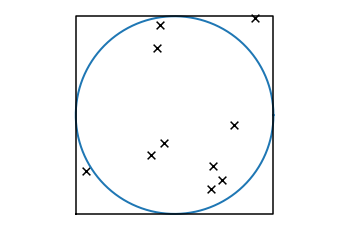

In [36]:
theta = np.linspace(0, 2*np.pi, 1001)
plt.plot(np.cos(theta), np.sin(theta), linewidth=2.0)
plt.plot((-1, -1, 1, 1, -1), (-1, 1, 1, -1, -1), color='k')
plt.axis('equal')
plt.axis('off')


for i in range(10):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    plt.scatter(x, y, marker='x', color='black', s=60)

plt.show()

Now, we need some way of *checking* wether a dart has hit the board or not. We can do this simply by computing the distance to the origin from $\sqrt{x^2 + y^2}$, if this distance is $\leq 1$, then by definition, we are outside the circle.

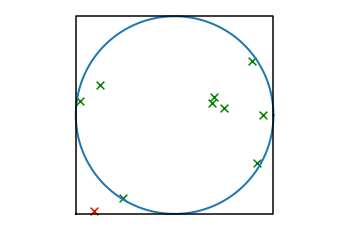

In [37]:
theta = np.linspace(0, 2*np.pi, 1001)
plt.plot(np.cos(theta), np.sin(theta), linewidth=2.0)
plt.plot((-1, -1, 1, 1, -1), (-1, 1, 1, -1, -1), color='k')
plt.axis('equal')
plt.axis('off')


for i in range(10):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)

    if np.sqrt(x**2 + y**2) <= 1:
        plt.scatter(x, y, marker='x', color='green', s=60)
    else:
        plt.scatter(x, y, marker='x', color='red', s=60)

plt.show()

Now, to find the actual probability, we don't need to plot, so we can simply draw the numbers and check:

In [38]:
N = 10**5
hits = 0

for i in range(N):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    if np.sqrt(x**2 + y**2) <= 1:
        hits += 1

pi_estimate = 4*hits/N
print(pi_estimate)

3.14068


Our program works well, but it is far from optimized. For one thing we can vectorize it:

In [39]:
N = 10**5
x = np.random.uniform(-1, 1, size=N)
y = np.random.uniform(-1, 1, size=N)
hits = np.sum(np.sqrt(x**2 + y**2) <= 1)

pi_estimate = 4*hits/N
print(pi_estimate)

3.14116


But we can go even further. For one, we don't actually need to do `uniform(-1, 1)`. We can simply draw numbers from $[0, 1)$ instead. This is because the geometry is symmetrical, so working only in the upper right corner works just as well. Using `random` is faster than `uniform`. In addition, note that we are checking the square root against 1. But $\sqrt{1} = 1$, so we can simply skip the square root. Taking the square is an expensive operation, and so skipping it will give a large speed-boost

In [40]:
N = 10**7
x = np.random.random(size=N)
y = np.random.random(size=N)
hits = np.sum(x**2 + y**2 <= 1)

pi_estimate = 4*hits/N
print(pi_estimate)

3.1409668


We can compare the non-optimized scaler version, and our fully optimized solutions on speed:

In [41]:
def simple_darts(N):
    hits = 0
    for i in range(N):
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
        if np.sqrt(x**2 + y**2) <= 1:
            hits += 1
    return 4*hits/N

def optimized_darts(N):
    x = np.random.random(size=N)
    y = np.random.random(size=N)
    hits = np.sum(x**2 + y**2 <= 1)
    return 4*hits/N

In [42]:
%timeit simple_darts(10**6)

6.32 s ± 18.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
%timeit optimized_darts(10**6)

24.7 ms ± 292 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Monte Carlo Integration

The example of throwing darts to find $\pi$ works because we can estimate the probability of hitting the board. However, this in turn is proportional to the *area* of the board. Effectively, are throwing darts to find the area under a curve. Integrating a function is actually the process of finding the area under the curve. It therefore turns out that by "throwing darts" in this way, we can integrate more or less *any* function. This is known as Monte Carlo Integration.


### Some Formalities

Let us formalize our statements a bit. For any integral, we can express it in another way using the Mean-Value Theorem:

$$\int_a^b f(x)\ {\rm d}x = (b-a)\bar{f}.$$

Here, $\bar{f}$ denotes the mean value of $f$ on the interval $[a, b]$, which is defined as

$$\bar{f} = \frac{1}{b-a}\int_{a}^b f(x)\ {\rm d}x.$$

This is just a rewriting of the integral. To interpret the area under the curve as a rectangle with a height of $\bar{f}$ and a width of $b-a$.

In numerical integration we find an approximation to the integral by approximating the mean value of the function by evaluating it in a *finite* number of points:
$$\bar{f} \approx \frac{1}{n}\sum_{i=0}^{n-1} f(x_i).$$
Now. Precisely *what* points you sample your function in, and how many points you use, is adjustable. And depending on how we choose those points, we say we are using different numerical *schemes*.

If we for example choose to use uniformly spaced points $N$ uniformly spaced points in the range $[a, b)$, i.e., the points

$$x_i = a + i\cdot h, \qquad i=0, \ldots N-1,$$

we have the left Riemann sum. Or we can do the right Riemann sum, which is just the right-aligned points instead

$$x_i = a + (i+1)\cdot h, \qquad i=0, \ldots N-1,$$

or we can use the *middle* of each interval, which gives the famous *midpoint* method

$$x_i = a + (i+\frac{1}{2})\cdot h, \qquad i=0, \ldots N-1,$$

The more points $N$ we use, the better out numerical approximation of the integral will be. And while we won't prove it here, you might recall from earlier classes, such as MAT-INF1100, that the error of these schemes can be analyzed. It turns out that the left and right Riemann sum both have an error on the order of $\mathcal{O}(1/N).$ As the number of points used grows, the error decreases. Because the step length $h$ is inversely proportional to $N$ we can also formulate the error as $\mathcal{O}(h)$, i.e., if the step length is halved, the error should also be halved.

Now, for the midpoint method however, it turns out to be better, we get $\mathcal{O}(1/N^2)$ or $\mathcal{O}(h^2)$. We therefore say the midpoint method is a *second-order* method. If reduce the step length by a factor of 10, the error should decrease by a factor of a 100. This gives good scaling and better convergence of the solution.

In addition to these, many other numerical integration schemes exists, such as the *trapezoidal* rule, or Simpson's method. But the idea is the same, we approximate the integral with some finite sum.

The idea behind Monte Carlo integration is that we do the exact same, but instead of spreading the points out uniformly over the interval $[a, b]$, we select a set of *random* points. As long as we draw the points from a uniform distribution, the sampling will tend to be uniform, and so will (given enough points) be a good mean of the function and thus a good integral.


### Implementing Monte Carlo integration

The idea behind Monte Carlo integration is quite simple, and implementing a function that carries out the technique to integrate an arbitrary function on the interval $[a, b]$ is therefore not too tricky:

In [44]:
def monte_carlo_integrate(f, a, b, n):
    total = 0
    for i in range(n):
        x = random.uniform(a, b)
        total += f(x)
    return (b-a)*total/n

Let us try to function, by performing the integral
$$\int_0^{2} e^{4x} \cos (2x) {\rm\ d}x.$$

Plugging this formula into Wolfram Alpha tells us the answer should be

$$\frac{1}{10}\bigg(e^{8}\big(sin(4) + 2\cos(4)\big) - 2\bigg).$$

In [45]:
def f(x):
    return np.exp(4*x)*np.cos(2*x)

approx = monte_carlo_integrate(f, 0, 2, 1000)
exact = (np.exp(8)*(np.sin(4) + 2*np.cos(4)) - 2)/10


print("Approx: ", approx)
print("Exact: ", exact)

Approx:  -630.398172265861
Exact:  -615.4964787585798


Because Monte Carlo integration is inherently random, we get a slightly different estimate each time we run the function

In [46]:
print(monte_carlo_integrate(f, 0, 2, 1000))
print(monte_carlo_integrate(f, 0, 2, 1000))
print(monte_carlo_integrate(f, 0, 2, 1000))

-633.0297704225545
-656.8898169769027
-633.2168351593492


To get smaller error, and a better confidence interval, we should use more points. Before we do this, let us make a new version, that is vectorized

In [47]:
def monte_carlo_int_vectorized(f, a, b, n):
    x = np.random.uniform(a, b, n)
    total = np.sum(f(x))
    return float(b-a)*total/n

Note that this function will only work if the function `f` itself is vectorized. Luckily, all the numpy functions, such as `exp` and `cos` are vectorized, and so our `f` will be too.

Let us compute a set of estimates, with different $N$, and print out the relative error:

In [48]:
exact = (np.exp(8)*(np.sin(4) + 2*np.cos(4)) - 2)/10

for n in range(3, 8):
    N = 10**n
    I = monte_carlo_int_vectorized(f, 0, 2, N)
    rel_error = (I - exact)/exact
    print(f"{N:6.0e} {rel_error:15.5e}")

 1e+03     1.96059e-03
 1e+04    -3.17841e-03
 1e+05    -7.27216e-04
 1e+06     1.53144e-03


 1e+07    -2.48247e-04


We see that as the number of points increase, the error decreases. Now, while our simple experiment here is far for a conclusive proof of anything, it is interesting to note that the error decreases by an order of magnitude , when the number of samples increases by 2 order of magnitude. In fact, it can be shown that the error in Monte Carlo integration goes as $\mathcal{O}(1/\sqrt{N})$, so this makes sense. Note that in this case it isn't possible expressing the scaling in terms of the step length $h$, as there is no "step length".

### Why is Monte Carlo Integration useful?

We see that Monte Carlo integration scales as $\mathcal{O}(N^{-1/2})$, while the midpoint method (which is more or less just as simple to implement) scales as $\mathcal{O}(N^{-2})$, which is much better. Why would we ever use the Monte Carlo method, over the Midpoint method?

For simple integrals, one-dimensional integrals, such as the one shown here, using the midpoint method makes a lot more sense. It turns out however, if we go to more dimensions, such as a 3- or 4- dimensional integral, then  techniques where you try to cover the whole space quickly become insurmountable, as decreasing halving your step size demands using a lot more points. For such problems, Monte Carlo integration scales better, and start outperforming techniques such as the midpoint rule.

There is also ways to modify Monte Carlo integration to make it more useful. If we plot the function we integrated above for example, we see that it starts out close to 0, and quickly grows very fast in the negative direction:

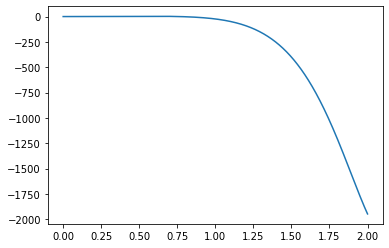

In [49]:
x = np.linspace(0, 2, 1001)
plt.plot(x, f(x))
plt.show()

When we are sampling this integral uniformly (either with the midpoint method or Monte Carlo), we are spending much of our numerical resources in an interval that doesn't really matter. What we should do, is instead sample with a better resolution closer to the high end of the interval.

For non-Monte Carlo methods, this can be achieved by selecting mesh points that are not uniformly spread out. For the Monte Carlo method however, we should instead not draw points from a uniform distribution, but from a distribution better suited for our problem. This is known as *importance sampling*, because we are trying to put more effort into the sampling that is important for the end result. For some problems, adding importance sampling will make Monte Carlo simulation a lot more efficient.